Install Library

In [467]:
%pip install pandas
%pip install plotly
%pip install matplotlib
%pip install nbformat
%pip install xgboost
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import

In [468]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta
import math

Read file

In [469]:
with open('/home/drasogun/DraSoGun/Work/CANSAT_UDUCK/Hardware/Data/log_1.txt', 'r', encoding='utf-8', errors='replace') as f:
    text = f.read()

Clean Data

In [470]:
blocks = text.split('-------------')
print(blocks)
sec = -1
b = -1
data = []
vis = []
listxt = ('S','R','I',' ','.',',','-','0','1','2','3','4','5','6','7','8','9','\n',':','n','a')

for block in blocks:
    b += 1
    ch = 1
    for s in block:
        if s not in listxt:
            ch = 0
            break
    vis.append(ch)
for x in vis:
    print(x,end=" ")

['14.508370,100.933414\n4251400\n6\n33164\n3440\n89\n8\n\n33.35\n1007.29\n49.76\n68.04\n\n0.69,-9.74,0.52\n-0.82,0.78,-0.95\n-86.95,-4.03\n\nRSSI : -89\n2025-05-30 11:25:14\n', '\n14.508370,100.933415\n4251600\n30\n33164\n3420\n89\n8\n\n33.36\n1007.30\n49.65\n68.05\n\n3.25,-5.22,4.26\n-8.78,-3.89,-5.40\n-50.75,-25.72\n\nRSSI : -95\n2025-05-30 11:25:16\n', '\n14.508370,100.933415\n4251600\n30\n33164\n3420\n89\n8\n\n33.37\n1007.28\n49.81\n68.06\n\n0.43,-9.76,0.67\n4.18,2.15,-2.29\n-86.06,-2.49\n\nRSSI : -93\n2025-05-30 11:25:18\n', '\n14.508370,100.933417\n4251900\n22\n33164\n3370\n99\n7\n\n33.39\n1007.30\n49.62\n68.08\n\n0.72,-9.86,0.34\n4.61,0.67,-1.42\n-88.05,-4.16\n\nRSSI : -95\n2025-05-30 11:25:20\n', '\n14.508369,100.933417\n4252100\n9\n33164\n3330\n89\n8\n\n33.40\n1007.26\n49.98\n68.08\n\n0.55,-9.67,0.48\n-0.46,0.67,-1.60\n-87.15,-3.25\n\nRSSI : -92\n2025-05-30 11:25:21\n', '\n14.508368,100.933418\n4252300\n14\n33164\n3330\n89\n8\n\n33.41\n1007.24\n50.14\n68.09\n\n0.71,-9.70,0.49\

Add Data

In [471]:
blocks = text.split('-------------')
sec = -1
b = -1
data = []
vis = []
listxt = ('S','R','I',' ','.',',','-','0','1','2','3','4','5','6','7','8','9','\n',':','n','a')

for block in blocks:
    b += 1
    ch = 1
    for s in block:
        if s not in listxt:
            ch = 0
            break
    vis.append(ch)
for block in blocks:
    sec += 1
    if not vis[sec]:
        data.append({
            'second': sec,
            'Time': float('nan'),
            'Latitude': float('nan'),
            'Longitude': float('nan'),
            'Speed': float('nan'),
            'Course': float('nan'),
            'Altitude_GPS': float('nan'),
            'HDOP': float('nan'),
            'Satellite': float('nan'),
            'Temp': float('nan'),
            'Pressure': float('nan'),
            'Altitude_BME280': float('nan'),
            'Humidity': float('nan'),
            'Acc_x': float('nan'),
            'Acc_y': float('nan'),
            'Acc_z': float('nan'),
            'Gyro_x': float('nan'),
            'Gyro_y': float('nan'),
            'Gyro_z': float('nan'),
            'Roll': float('nan'),
            'Pitch': float('nan'),
            'Tilted_x': float('nan'),
            'Tilted_y': float('nan'),
            'RSSI': float('nan')
        })
        continue
    lines = [l.strip() for l in block.splitlines() if l.strip()]
    if len(lines) < 16:
        continue
    # receive data
    latlon = lines[0]
    raw_time = lines[1]
    sp     = lines[2]
    cu     = lines[3]
    altg   = lines[4]
    hdop   = lines[5]
    sat    = lines[6]
    tmp    = lines[7]
    hPa    = lines[8]
    altb   = lines[9]
    hm     = lines[10]
    acc    = lines[11]
    gyro   = lines[12]
    mag    = lines[13]
    rssi   = lines[14]
    dt     = lines[15]
    #tranform data
    if latlon == '-':
        lat = lon = float('nan')
    else:
        lat, lon = map(float, latlon.split(','))
    def f(x): return float(x) if x != '-' else float('nan')
    def i(x): return int(x)   if x != '-' else None

    sp   = f(sp)
    cu   = f(cu)
    altg = f(altg)
    hdop = i(hdop)
    sat  = i(sat)
    tmp  = f(tmp)
    hPa  = f(hPa)
    altb = f(altb)
    hm   = f(hm)

    ax, ay, az = map(float, acc.split(','))
    gx, gy, gz = map(float, gyro.split(','))
    roll, pitch     = map(float, mag.split(','))
    mx = roll
    my = pitch
    if sec == 0:
        fmx = mx
        fmy = my
        mx = 0
        my = 0
    else:
        mx = abs(mx) - abs(fmx)
        my = abs(my) - abs(fmy)
    rssi = int(rssi.split(':')[1].strip())
    #updata on data var
    data.append({
        'second': sec,
        'Time': dt,
        'Latitude': lat,
        'Longitude': lon,
        'Speed': sp,
        'Course': cu,
        'Altitude_GPS': altg,
        'HDOP': hdop,
        'Satellite': sat,
        'Temp': tmp,
        'Pressure': hPa,
        'Altitude_BME280': altb,
        'Humidity': hm,
        'Acc_x': ax,
        'Acc_y': ay,
        'Acc_z': az,
        'Gyro_x': gx,
        'Gyro_y': gy,
        'Gyro_z': gz,
        'Roll': roll,
        'Pitch': pitch,
        'Tilted_x': mx,
        'Tilted_y': my,
        'RSSI': rssi
    })

Data Fram

In [472]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [473]:
df = pd.DataFrame(data)
df

,second,Time,Latitude,Longitude,Speed,Course,Altitude_GPS,HDOP,Satellite,Temp,Pressure,Altitude_BME280,Humidity,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Roll,Pitch,Tilted_x,Tilted_y,RSSI
0,0,2025-05-30 11:25:14,14.508370,100.933414,6.0,33164.0,3440.0,89.0,8.0,33.35,1007.29,49.76,68.04,0.69,-9.74,0.52,-0.82,0.78,-0.95,-86.95,-4.03,0.00,0.00,-89.0
1,1,2025-05-30 11:25:16,14.508370,100.933415,30.0,33164.0,3420.0,89.0,8.0,33.36,1007.30,49.65,68.05,3.25,-5.22,4.26,-8.78,-3.89,-5.40,-50.75,-25.72,-36.20,21.69,-95.0
2,2,2025-05-30 11:25:18,14.508370,100.933415,30.0,33164.0,3420.0,89.0,8.0,33.37,1007.28,49.81,68.06,0.43,-9.76,0.67,4.18,2.15,-2.29,-86.06,-2.49,-0.89,-1.54,-93.0
3,3,2025-05-30 11:25:20,14.508370,100.933417,22.0,33164.0,3370.0,99.0,7.0,33.39,1007.30,49.62,68.08,0.72,-9.86,0.34,4.61,0.67,-1.42,-88.05,-4.16,1.10,0.13,-95.0
4,4,2025-05-30 11:25:21,14.508369,100.933417,9.0,33164.0,3330.0,89.0,8.0,33.40,1007.26,49.98,68.08,0.55,-9.67,0.48,-0.46,0.67,-1.60,-87.15,-3.25,0.20,-0.78,-92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,524,2025-05-30 11:43:08,14.509510,100.933195,57.0,9070.0,2760.0,66.0,12.0,179.50,-208.79,NaN,100.00,-0.43,-8.21,-4.69,-14.27,24.53,-38.25,-119.73,2.58,32.78,-1.45,-108.0
521,525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522,526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523,527,2025-05-30 11:43:14,14.509508,100.933197,12.0,7438.0,2770.0,66.0,12.0,179.50,-208.79,NaN,100.00,1.78,-9.02,-3.66,0.00,-1.70,-0.38,-112.09,-10.38,25.14,6.35,-110.0


In [474]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df = df.set_index('Time')

# Drop duplicate index entries
df = df[~df.index.duplicated(keep='first')]

full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='1S')
df = df.reindex(full_range)
df = df.reset_index().rename(columns={'index': 'Time'})
df['second'] = (df['Time'] - df['Time'].iloc[0]).dt.total_seconds().astype('int')

/tmp/ipykernel_1076830/3766748149.py:7: FutureWarning:

'S' is deprecated and will be removed in a future version, please use 's' instead.



In [475]:
df

,Time,second,Latitude,Longitude,Speed,Course,Altitude_GPS,HDOP,Satellite,Temp,Pressure,Altitude_BME280,Humidity,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Roll,Pitch,Tilted_x,Tilted_y,RSSI
0,2025-05-30 11:25:14,0,14.508370,100.933414,6.0,33164.0,3440.0,89.0,8.0,33.35,1007.29,49.76,68.04,0.69,-9.74,0.52,-0.82,0.78,-0.95,-86.95,-4.03,0.00,0.00,-89.0
1,2025-05-30 11:25:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-05-30 11:25:16,2,14.508370,100.933415,30.0,33164.0,3420.0,89.0,8.0,33.36,1007.30,49.65,68.05,3.25,-5.22,4.26,-8.78,-3.89,-5.40,-50.75,-25.72,-36.20,21.69,-95.0
3,2025-05-30 11:25:17,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-05-30 11:25:18,4,14.508370,100.933415,30.0,33164.0,3420.0,89.0,8.0,33.37,1007.28,49.81,68.06,0.43,-9.76,0.67,4.18,2.15,-2.29,-86.06,-2.49,-0.89,-1.54,-93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2025-05-30 11:43:10,1076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077,2025-05-30 11:43:11,1077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1078,2025-05-30 11:43:12,1078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1079,2025-05-30 11:43:13,1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [476]:
df_l = df.interpolate(method='linear')
df_l

,Time,second,Latitude,Longitude,Speed,Course,Altitude_GPS,HDOP,Satellite,Temp,Pressure,Altitude_BME280,Humidity,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Roll,Pitch,Tilted_x,Tilted_y,RSSI
0,2025-05-30 11:25:14,0,14.508370,100.933414,6.0,33164.0,3440.000000,89.0,8.0,33.350,1007.290,49.760,68.040,0.690000,-9.740,0.520000,-0.820000,0.780000,-0.950000,-86.950000,-4.030,0.000000,0.000,-89.000000
1,2025-05-30 11:25:15,1,14.508370,100.933414,18.0,33164.0,3430.000000,89.0,8.0,33.355,1007.295,49.705,68.045,1.970000,-7.480,2.390000,-4.800000,-1.555000,-3.175000,-68.850000,-14.875,-18.100000,10.845,-92.000000
2,2025-05-30 11:25:16,2,14.508370,100.933415,30.0,33164.0,3420.000000,89.0,8.0,33.360,1007.300,49.650,68.050,3.250000,-5.220,4.260000,-8.780000,-3.890000,-5.400000,-50.750000,-25.720,-36.200000,21.690,-95.000000
3,2025-05-30 11:25:17,3,14.508370,100.933415,30.0,33164.0,3420.000000,89.0,8.0,33.365,1007.290,49.730,68.055,1.840000,-7.490,2.465000,-2.300000,-0.870000,-3.845000,-68.405000,-14.105,-18.545000,10.075,-94.000000
4,2025-05-30 11:25:18,4,14.508370,100.933415,30.0,33164.0,3420.000000,89.0,8.0,33.370,1007.280,49.810,68.060,0.430000,-9.760,0.670000,4.180000,2.150000,-2.290000,-86.060000,-2.490,-0.890000,-1.540,-93.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2025-05-30 11:43:10,1076,14.509509,100.933196,42.0,8526.0,2763.333333,66.0,12.0,179.500,-208.790,51.470,100.000,0.306667,-8.480,-4.346667,-9.513333,15.786667,-25.626667,-117.183333,-1.740,30.233333,1.150,-108.666667
1077,2025-05-30 11:43:11,1077,14.509509,100.933196,34.5,8254.0,2765.000000,66.0,12.0,179.500,-208.790,51.470,100.000,0.675000,-8.615,-4.175000,-7.135000,11.415000,-19.315000,-115.910000,-3.900,28.960000,2.450,-109.000000
1078,2025-05-30 11:43:12,1078,14.509509,100.933196,27.0,7982.0,2766.666667,66.0,12.0,179.500,-208.790,51.470,100.000,1.043333,-8.750,-4.003333,-4.756667,7.043333,-13.003333,-114.636667,-6.060,27.686667,3.750,-109.333333
1079,2025-05-30 11:43:13,1079,14.509508,100.933197,19.5,7710.0,2768.333333,66.0,12.0,179.500,-208.790,51.470,100.000,1.411667,-8.885,-3.831667,-2.378333,2.671667,-6.691667,-113.363333,-8.220,26.413333,5.050,-109.666667


In [477]:
sdf_l = df_l.iloc[0:800:,0::]
sdf_l

,Time,second,Latitude,Longitude,Speed,Course,Altitude_GPS,HDOP,Satellite,Temp,Pressure,Altitude_BME280,Humidity,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Roll,Pitch,Tilted_x,Tilted_y,RSSI
0,2025-05-30 11:25:14,0,14.508370,100.933414,6.0,33164.0,3440.0,89.0,8.0,33.3500,1007.2900,49.7600,68.0400,0.6900,-9.7400,0.520,-0.82,0.7800,-0.950,-86.950,-4.0300,0.000,0.0000,-89.0
1,2025-05-30 11:25:15,1,14.508370,100.933414,18.0,33164.0,3430.0,89.0,8.0,33.3550,1007.2950,49.7050,68.0450,1.9700,-7.4800,2.390,-4.80,-1.5550,-3.175,-68.850,-14.8750,-18.100,10.8450,-92.0
2,2025-05-30 11:25:16,2,14.508370,100.933415,30.0,33164.0,3420.0,89.0,8.0,33.3600,1007.3000,49.6500,68.0500,3.2500,-5.2200,4.260,-8.78,-3.8900,-5.400,-50.750,-25.7200,-36.200,21.6900,-95.0
3,2025-05-30 11:25:17,3,14.508370,100.933415,30.0,33164.0,3420.0,89.0,8.0,33.3650,1007.2900,49.7300,68.0550,1.8400,-7.4900,2.465,-2.30,-0.8700,-3.845,-68.405,-14.1050,-18.545,10.0750,-94.0
4,2025-05-30 11:25:18,4,14.508370,100.933415,30.0,33164.0,3420.0,89.0,8.0,33.3700,1007.2800,49.8100,68.0600,0.4300,-9.7600,0.670,4.18,2.1500,-2.290,-86.060,-2.4900,-0.890,-1.5400,-93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2025-05-30 11:38:29,795,14.507814,100.933731,0.0,0.0,2990.0,67.0,12.0,36.1500,1007.1000,51.2900,65.8600,1.2500,-9.5300,1.680,-0.80,0.7800,-1.180,-79.980,-7.3900,-6.970,3.3600,-116.0
796,2025-05-30 11:38:30,796,14.507814,100.933731,0.5,0.0,2985.0,67.0,12.0,36.1525,1007.0975,51.3175,65.8575,1.2475,-9.5275,1.680,-0.83,0.7825,-1.195,-79.980,-7.3725,-6.970,3.3425,-116.0
797,2025-05-30 11:38:31,797,14.507815,100.933730,1.0,0.0,2980.0,67.0,12.0,36.1550,1007.0950,51.3450,65.8550,1.2450,-9.5250,1.680,-0.86,0.7850,-1.210,-79.980,-7.3550,-6.970,3.3250,-116.0
798,2025-05-30 11:38:32,798,14.507815,100.933730,1.5,0.0,2975.0,67.0,12.0,36.1575,1007.0925,51.3725,65.8525,1.2425,-9.5225,1.680,-0.89,0.7875,-1.225,-79.980,-7.3375,-6.970,3.3075,-116.0


In [478]:
sdf = df.iloc[0:800:,0::]
sdf

,Time,second,Latitude,Longitude,Speed,Course,Altitude_GPS,HDOP,Satellite,Temp,Pressure,Altitude_BME280,Humidity,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Roll,Pitch,Tilted_x,Tilted_y,RSSI
0,2025-05-30 11:25:14,0,14.508370,100.933414,6.0,33164.0,3440.0,89.0,8.0,33.35,1007.29,49.76,68.04,0.69,-9.74,0.52,-0.82,0.78,-0.95,-86.95,-4.03,0.00,0.00,-89.0
1,2025-05-30 11:25:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-05-30 11:25:16,2,14.508370,100.933415,30.0,33164.0,3420.0,89.0,8.0,33.36,1007.30,49.65,68.05,3.25,-5.22,4.26,-8.78,-3.89,-5.40,-50.75,-25.72,-36.20,21.69,-95.0
3,2025-05-30 11:25:17,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-05-30 11:25:18,4,14.508370,100.933415,30.0,33164.0,3420.0,89.0,8.0,33.37,1007.28,49.81,68.06,0.43,-9.76,0.67,4.18,2.15,-2.29,-86.06,-2.49,-0.89,-1.54,-93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2025-05-30 11:38:29,795,14.507814,100.933731,0.0,0.0,2990.0,67.0,12.0,36.15,1007.10,51.29,65.86,1.25,-9.53,1.68,-0.80,0.78,-1.18,-79.98,-7.39,-6.97,3.36,-116.0
796,2025-05-30 11:38:30,796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,2025-05-30 11:38:31,797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,2025-05-30 11:38:32,798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [479]:
# %pip install openpyxl

# sdf_l.to_excel('output.xlsx', index=False)

Plot graph

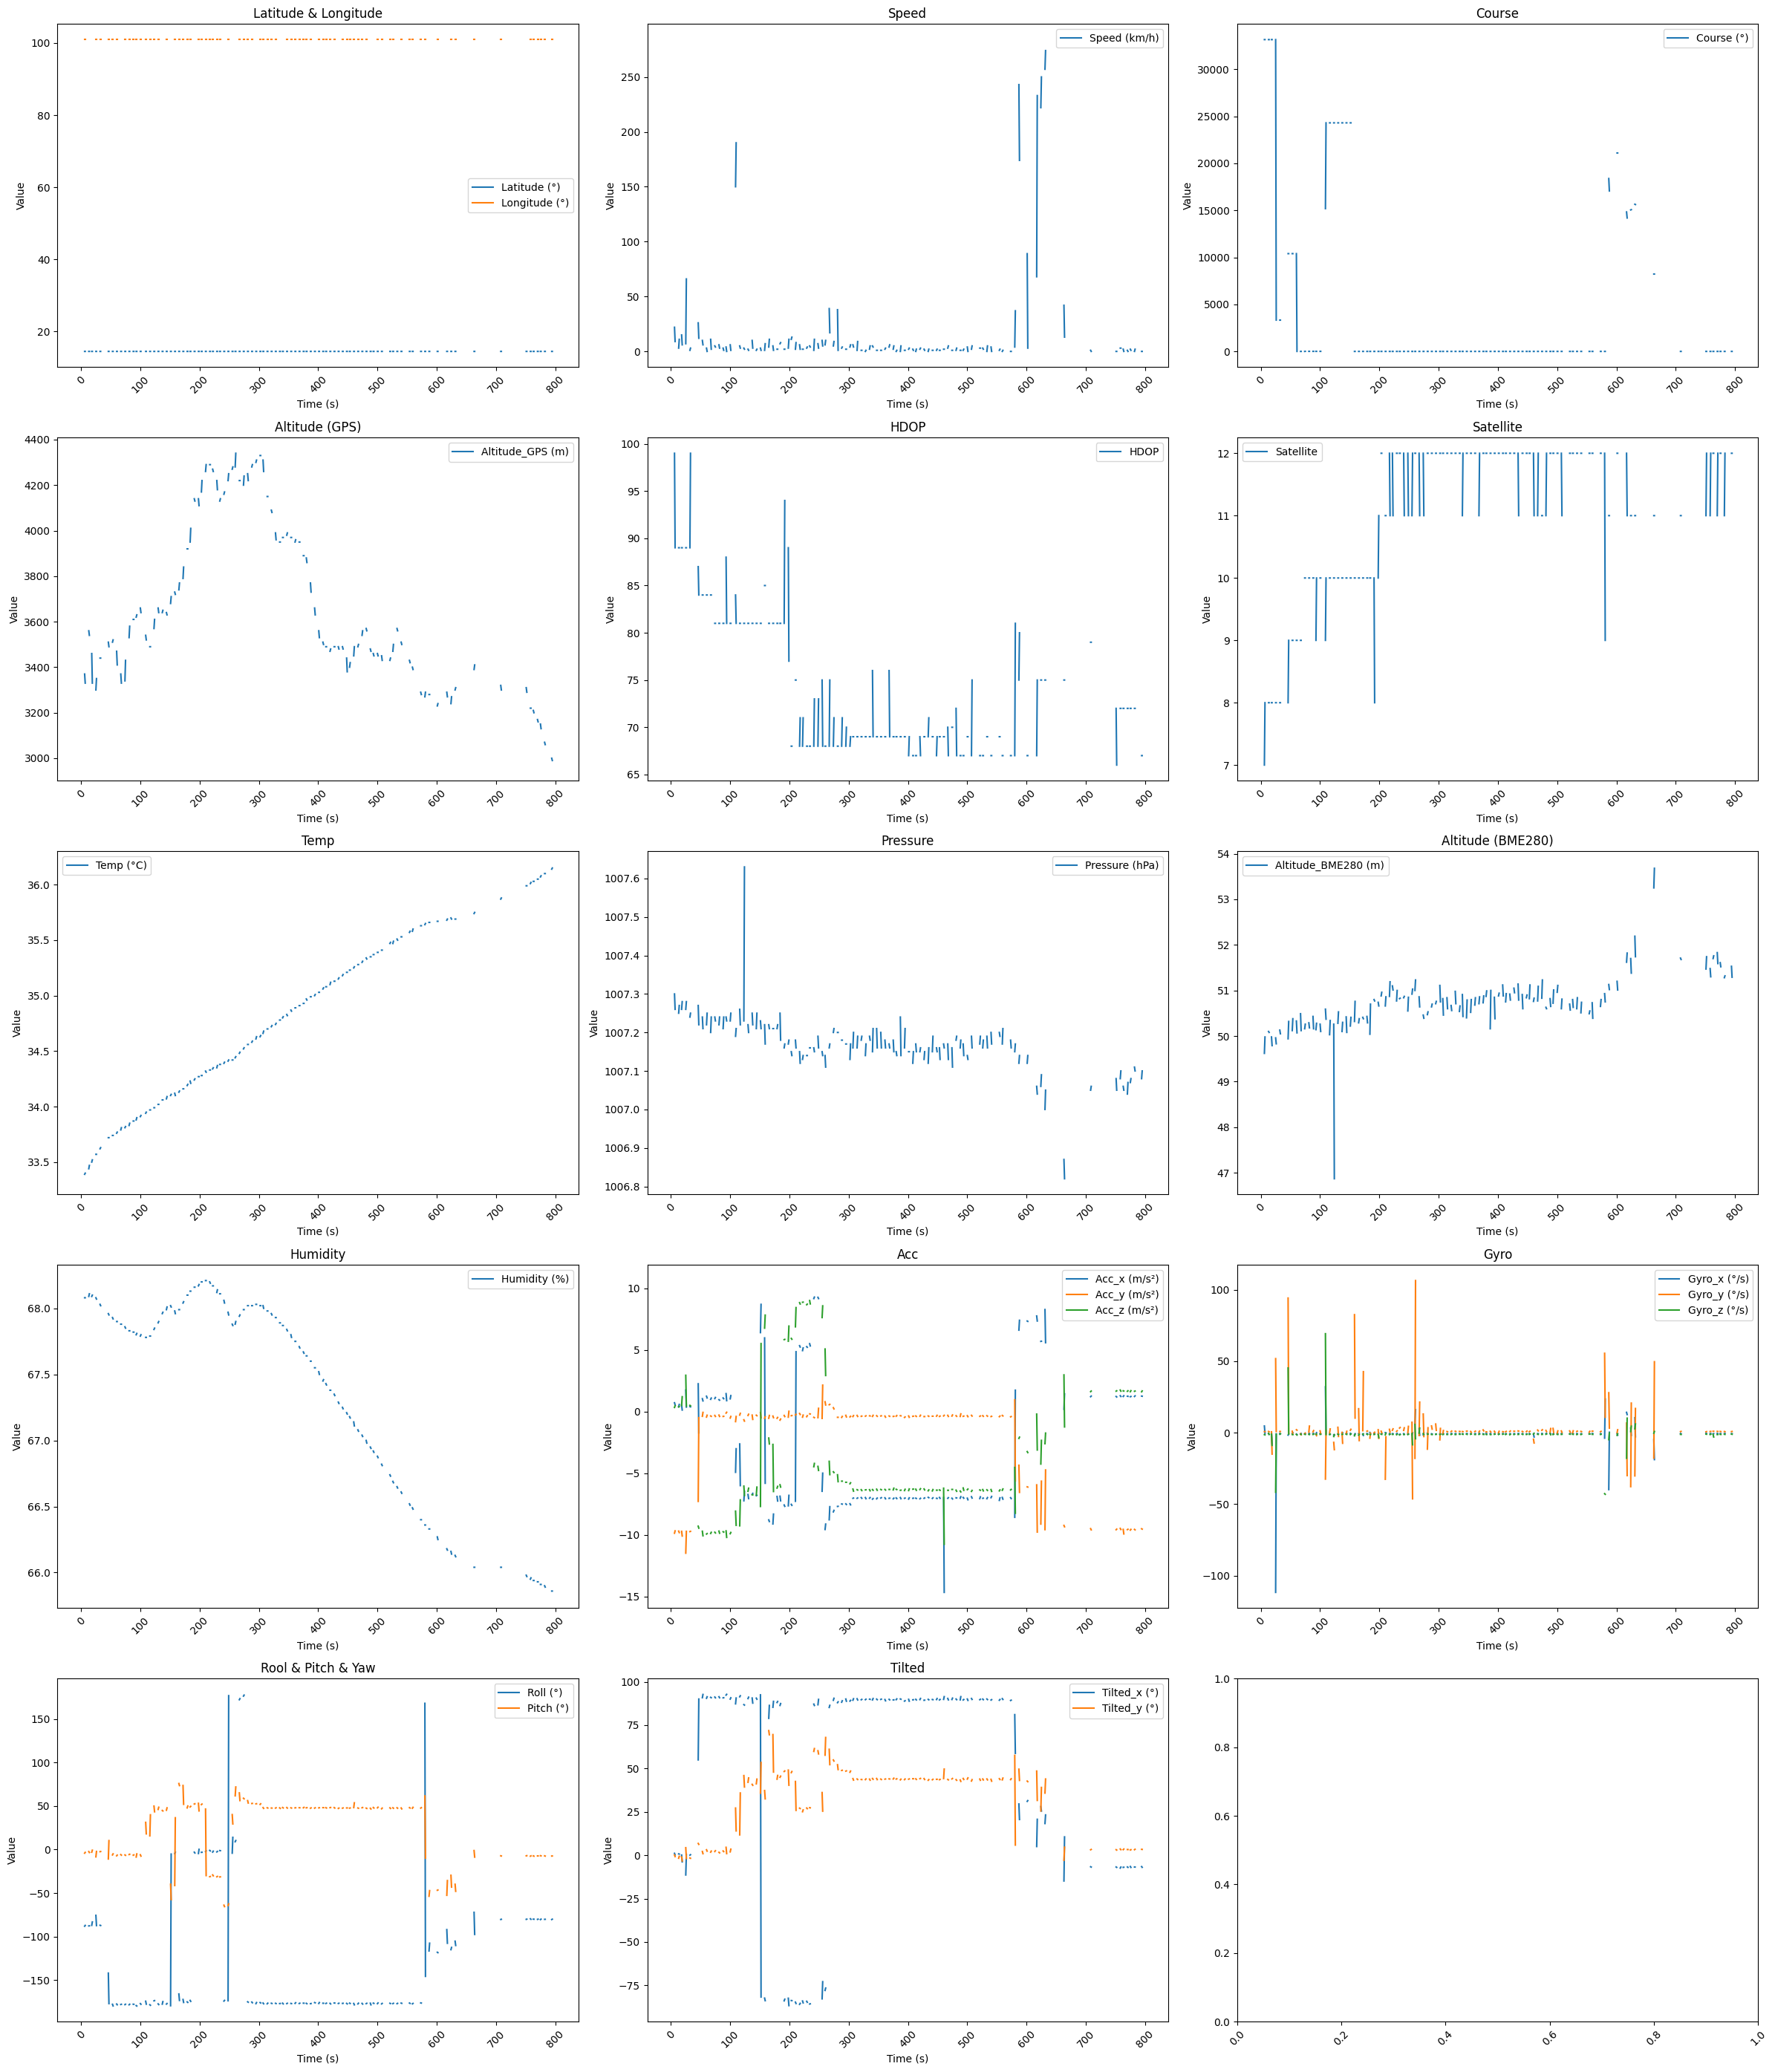

In [ ]:
fig, axes = plt.subplots(5, 3,figsize=(24, 28))
ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15 = axes.flatten()

# Latitude & Longitude
ax1.plot(sdf['second'], sdf['Latitude'], label='Latitude (°)')
ax1.plot(sdf['second'], sdf['Longitude'], label='Longitude (°)')
ax1.set_title('Latitude & Longitude')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Value')
ax1.legend()

# Speed
ax2.plot(sdf['second'], sdf['Speed'], label='Speed (km/h)')
ax2.set_title('Speed')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Value')
ax2.legend()

# Course
ax3.plot(sdf['second'], sdf['Course'], label='Course (°)')
ax3.set_title('Course')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Value')
ax3.legend()

# Altitude_GPS
ax4.plot(sdf['second'], sdf['Altitude_GPS'], label='Altitude_GPS (m)')
ax4.set_title('Altitude (GPS)')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Value')
ax4.legend()

# HDOP	
ax5.plot(sdf['second'], sdf['HDOP'], label='HDOP')
ax5.set_title('HDOP')
ax5.set_xlabel('Time (s)')
ax5.set_ylabel('Value')
ax5.legend()

# Satellite
ax6.plot(sdf['second'], sdf['Satellite'], label='Satellite')
ax6.set_title('Satellite')
ax6.set_xlabel('Time (s)')
ax6.set_ylabel('Value')
ax6.legend()

# Temp
ax7.plot(sdf['second'], sdf['Temp'], label='Temp (°C)')
ax7.set_title('Temp')
ax7.set_xlabel('Time (s)')
ax7.set_ylabel('Value')
ax7.legend()

# Pressure
ax8.plot(sdf['second'], sdf['Pressure'], label='Pressure (hPa)')
ax8.set_title('Pressure')
ax8.set_xlabel('Time (s)')
ax8.set_ylabel('Value')
ax8.legend()

# Altitude_BME280
ax9.plot(sdf['second'], sdf['Altitude_BME280'], label='Altitude_BME280 (m)')
ax9.set_title('Altitude (BME280)')
ax9.set_xlabel('Time (s)')
ax9.set_ylabel('Value')
ax9.legend()

# Humidity
ax10.plot(sdf['second'], sdf['Humidity'], label='Humidity (%)')
ax10.set_title('Humidity')
ax10.set_xlabel('Time (s)')
ax10.set_ylabel('Value')
ax10.legend()

# Acc
ax11.plot(sdf['second'], sdf['Acc_x'], label='Acc_x (m/s²)')
ax11.plot(sdf['second'], sdf['Acc_y'], label='Acc_y (m/s²)')
ax11.plot(sdf['second'], sdf['Acc_z'], label='Acc_z (m/s²)')
ax11.set_title('Acc')
ax11.set_xlabel('Time (s)')
ax11.set_ylabel('Value')
ax11.legend()

# Gyro
ax12.plot(sdf['second'], sdf['Gyro_x'], label='Gyro_x (°/s)')
ax12.plot(sdf['second'], sdf['Gyro_y'], label='Gyro_y (°/s)')
ax12.plot(sdf['second'], sdf['Gyro_z'], label='Gyro_z (°/s)')
ax12.set_title('Gyro')
ax12.set_xlabel('Time (s)')
ax12.set_ylabel('Value')
ax12.legend()

# Roll Pitch Yaw
ax13.plot(sdf['second'], sdf['Roll'], label='Roll (°)')
ax13.plot(sdf['second'], sdf['Pitch'], label='Pitch (°)')
ax13.set_title('Rool & Pitch & Yaw')
ax13.set_xlabel('Time (s)')
ax13.set_ylabel('Value')
ax13.legend()

# Tilted
ax14.plot(sdf['second'], sdf['Tilted_x'], label='Tilted_x (°)')
ax14.plot(sdf['second'], sdf['Tilted_y'], label='Tilted_y (°)')
ax14.set_title('Tilted')
ax14.set_xlabel('Time (s)')
ax14.set_ylabel('Value')
ax14.legend()

RSSI
ax15.plot(sdf['second'], sdf['RSSI'], label='RSSI')
ax15.set_title('RSSI')
ax15.set_xlabel('Time (s)')
ax15.set_ylabel('Value')
ax15.legend()

# หมุน tick labels ทุกกราฟ
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.tight_layout()
plt.show()


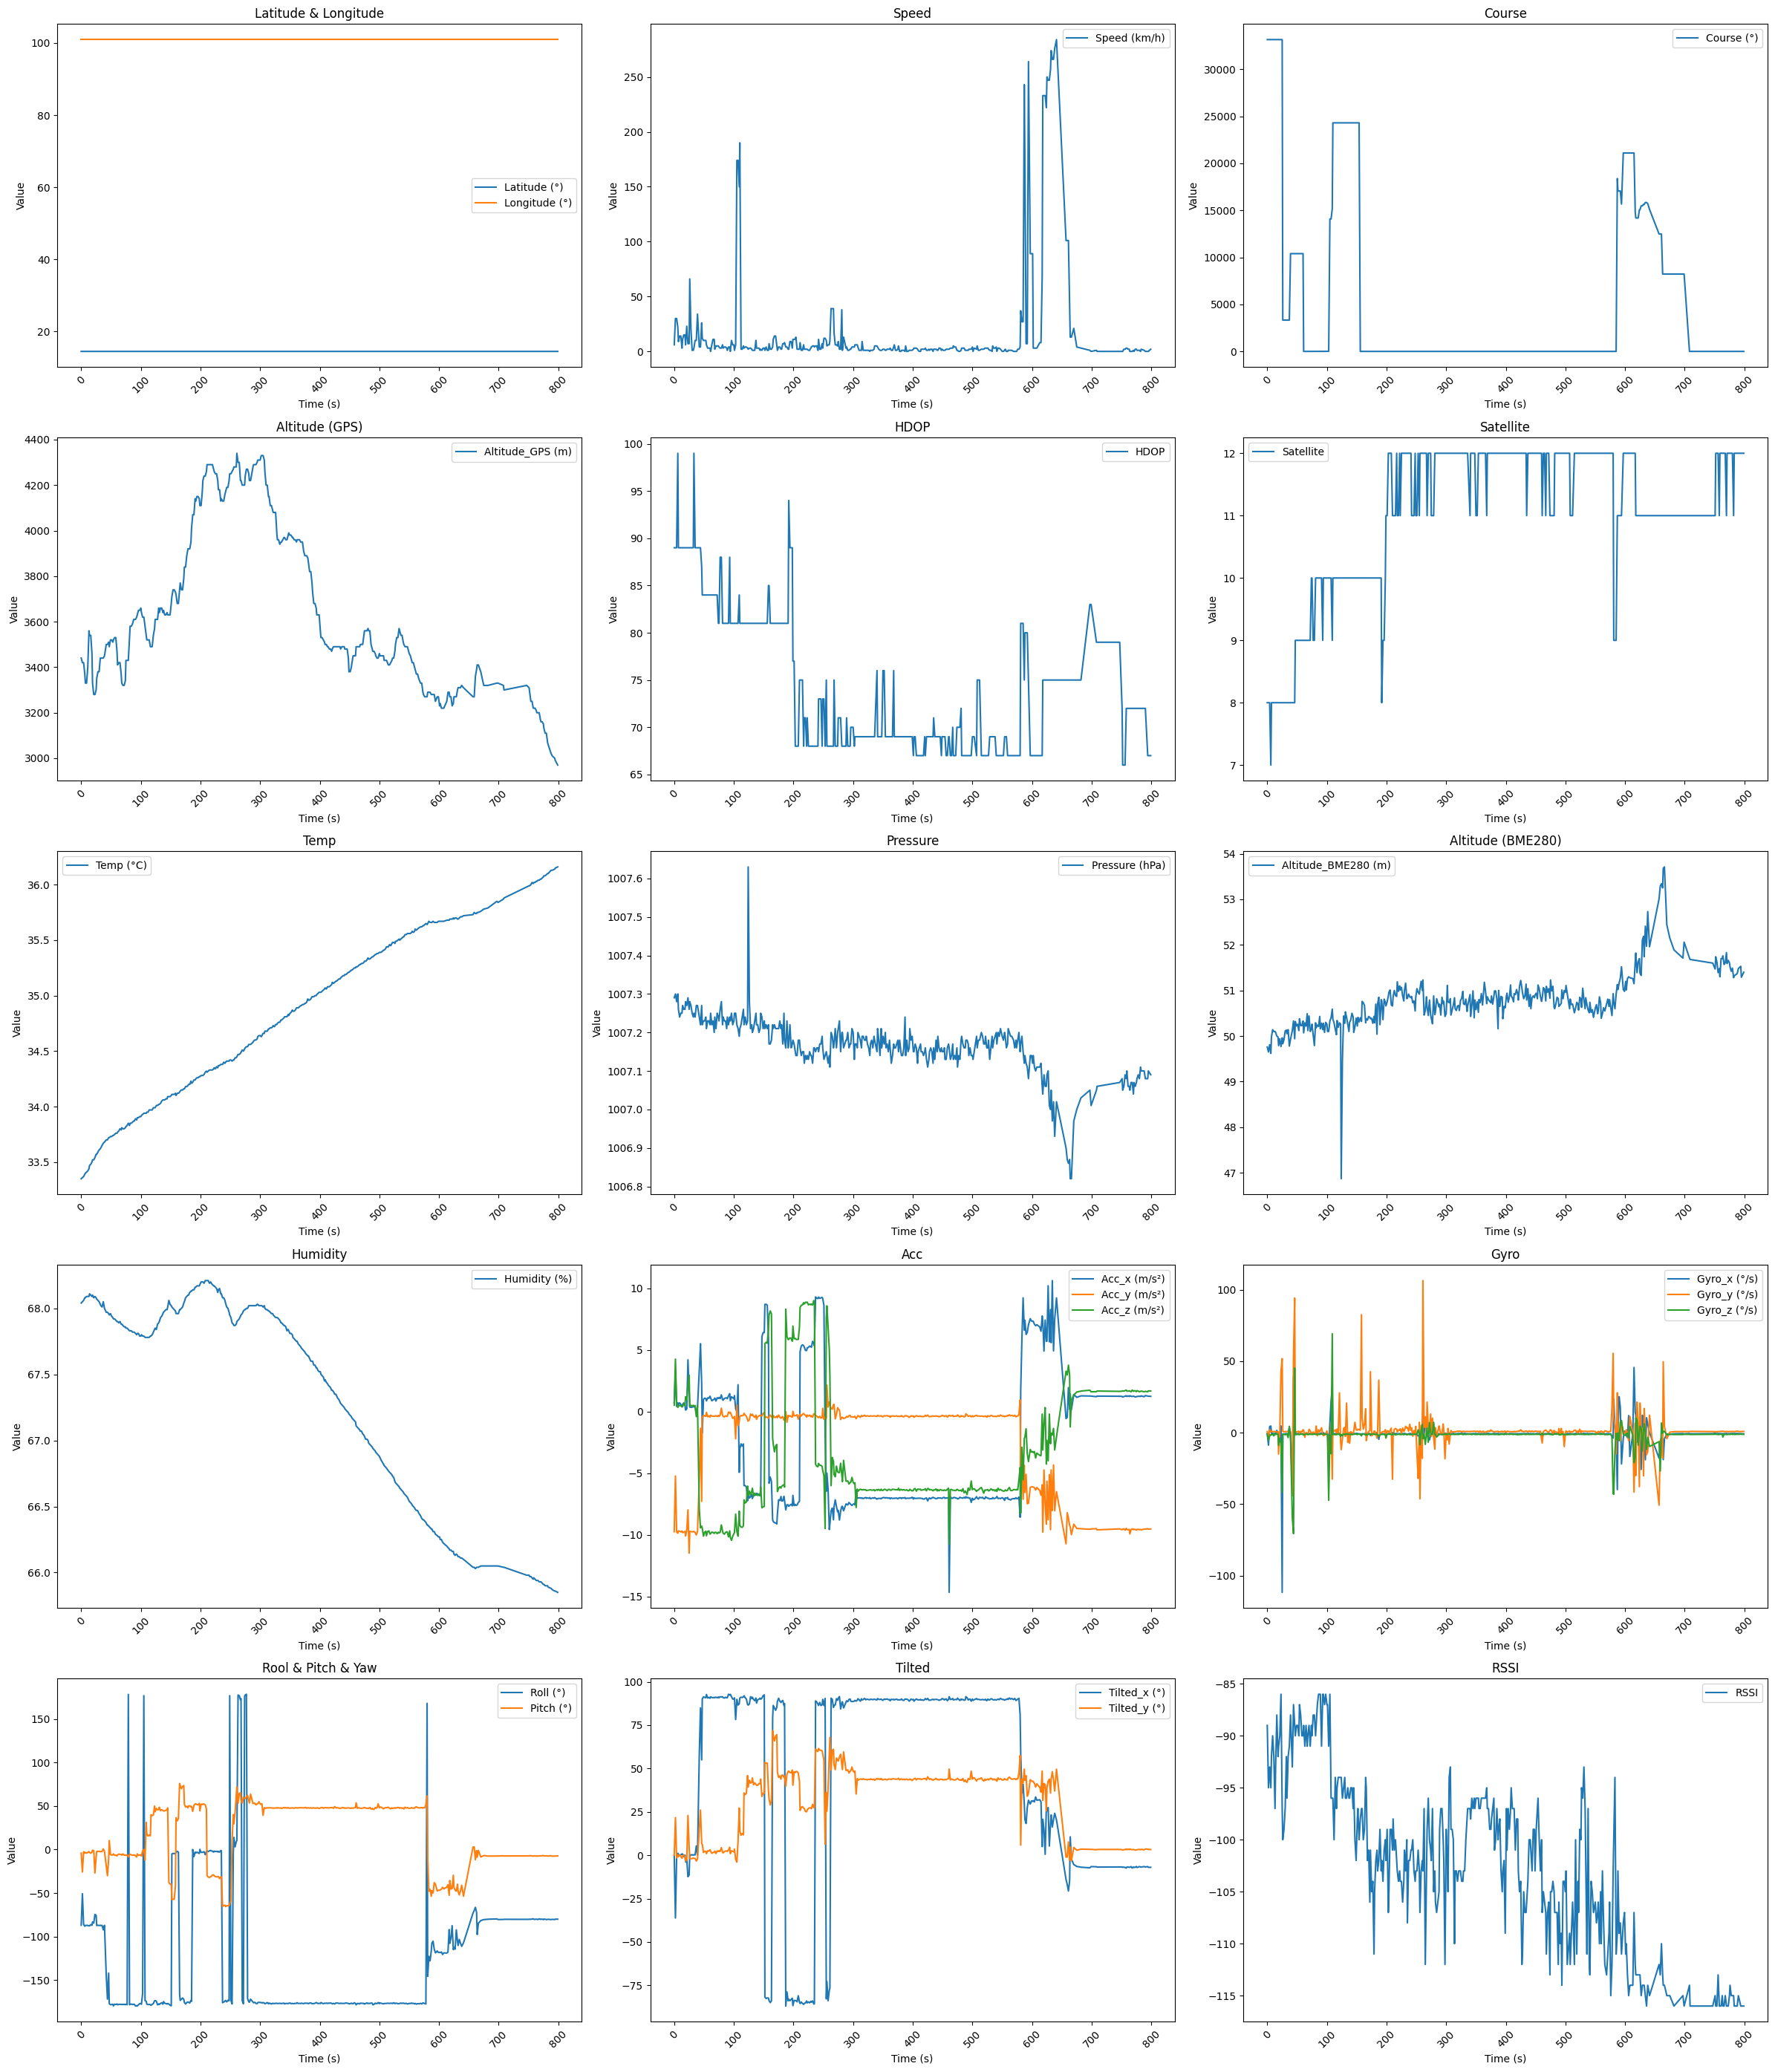

In [481]:
fig, axes = plt.subplots(5, 3,figsize=(24, 28))
ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15 = axes.flatten()

# Latitude & Longitude
ax1.plot(sdf_l['second'], sdf_l['Latitude'], label='Latitude (°)')
ax1.plot(sdf_l['second'], sdf_l['Longitude'], label='Longitude (°)')
ax1.set_title('Latitude & Longitude')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Value')
ax1.legend()

# Speed
ax2.plot(sdf_l['second'], sdf_l['Speed'], label='Speed (km/h)')
ax2.set_title('Speed')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Value')
ax2.legend()

# Course
ax3.plot(sdf_l['second'], sdf_l['Course'], label='Course (°)')
ax3.set_title('Course')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Value')
ax3.legend()

# Altitude_GPS
ax4.plot(sdf_l['second'], sdf_l['Altitude_GPS'], label='Altitude_GPS (m)')
ax4.set_title('Altitude (GPS)')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Value')
ax4.legend()

# HDOP	
ax5.plot(sdf_l['second'], sdf_l['HDOP'], label='HDOP')
ax5.set_title('HDOP')
ax5.set_xlabel('Time (s)')
ax5.set_ylabel('Value')
ax5.legend()

# Satellite
ax6.plot(sdf_l['second'], sdf_l['Satellite'], label='Satellite')
ax6.set_title('Satellite')
ax6.set_xlabel('Time (s)')
ax6.set_ylabel('Value')
ax6.legend()

# Temp
ax7.plot(sdf_l['second'], sdf_l['Temp'], label='Temp (°C)')
ax7.set_title('Temp')
ax7.set_xlabel('Time (s)')
ax7.set_ylabel('Value')
ax7.legend()

# Pressure
ax8.plot(sdf_l['second'], sdf_l['Pressure'], label='Pressure (hPa)')
ax8.set_title('Pressure')
ax8.set_xlabel('Time (s)')
ax8.set_ylabel('Value')
ax8.legend()

# Altitude_BME280
ax9.plot(sdf_l['second'], sdf_l['Altitude_BME280'], label='Altitude_BME280 (m)')
ax9.set_title('Altitude (BME280)')
ax9.set_xlabel('Time (s)')
ax9.set_ylabel('Value')
ax9.legend()

# Humidity
ax10.plot(sdf_l['second'], sdf_l['Humidity'], label='Humidity (%)')
ax10.set_title('Humidity')
ax10.set_xlabel('Time (s)')
ax10.set_ylabel('Value')
ax10.legend()

# Acc
ax11.plot(sdf_l['second'], sdf_l['Acc_x'], label='Acc_x (m/s²)')
ax11.plot(sdf_l['second'], sdf_l['Acc_y'], label='Acc_y (m/s²)')
ax11.plot(sdf_l['second'], sdf_l['Acc_z'], label='Acc_z (m/s²)')
ax11.set_title('Acc')
ax11.set_xlabel('Time (s)')
ax11.set_ylabel('Value')
ax11.legend()

# Gyro
ax12.plot(sdf_l['second'], sdf_l['Gyro_x'], label='Gyro_x (°/s)')
ax12.plot(sdf_l['second'], sdf_l['Gyro_y'], label='Gyro_y (°/s)')
ax12.plot(sdf_l['second'], sdf_l['Gyro_z'], label='Gyro_z (°/s)')
ax12.set_title('Gyro')
ax12.set_xlabel('Time (s)')
ax12.set_ylabel('Value')
ax12.legend()

# Roll Pitch Yaw
ax13.plot(sdf_l['second'], sdf_l['Roll'], label='Roll (°)')
ax13.plot(sdf_l['second'], sdf_l['Pitch'], label='Pitch (°)')
ax13.set_title('Rool & Pitch & Yaw')
ax13.set_xlabel('Time (s)')
ax13.set_ylabel('Value')
ax13.legend()

# Tilted
ax14.plot(sdf_l['second'], sdf_l['Tilted_x'], label='Tilted_x (°)')
ax14.plot(sdf_l['second'], sdf_l['Tilted_y'], label='Tilted_y (°)')
ax14.set_title('Tilted')
ax14.set_xlabel('Time (s)')
ax14.set_ylabel('Value')
ax14.legend()

# RSSI
ax15.plot(sdf_l['second'], sdf_l['RSSI'], label='RSSI')
ax15.set_title('RSSI')
ax15.set_xlabel('Time (s)')
ax15.set_ylabel('Value')
ax15.legend()

# หมุน tick labels ทุกกราฟ
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.tight_layout()
plt.show()


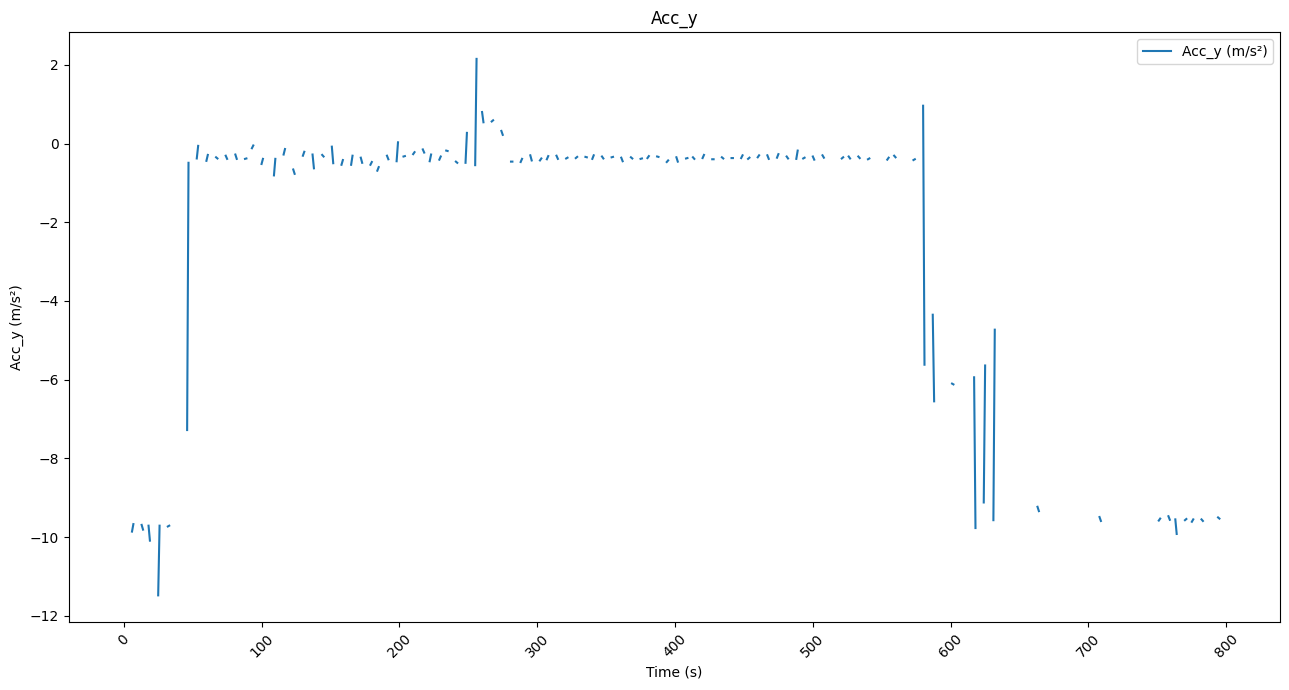

In [482]:
fig, ax = plt.subplots(1, 1,figsize=(13,7))

ax.plot(sdf['second'], sdf['Acc_y'], label='Acc_y (m/s²)')
ax.set_title('Acc_y')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acc_y (m/s²)')
ax.legend()
for label in ax.get_xticklabels():
    label.set_rotation(45)

fig.tight_layout()
plt.show()


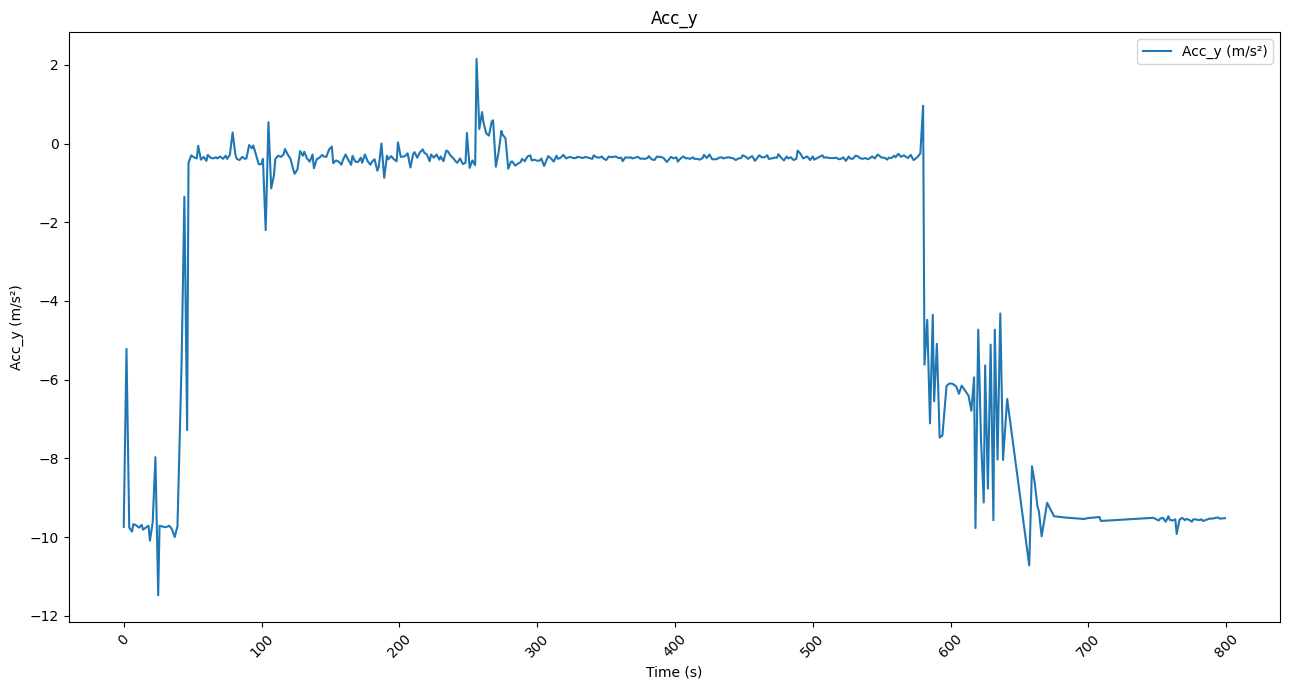

In [483]:
fig, ax = plt.subplots(1, 1,figsize=(13,7))

ax.plot(sdf_l['second'], sdf_l['Acc_y'], label='Acc_y (m/s²)')
ax.set_title('Acc_y')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acc_y (m/s²)')
ax.legend()
for label in ax.get_xticklabels():
    label.set_rotation(45)

fig.tight_layout()
plt.show()

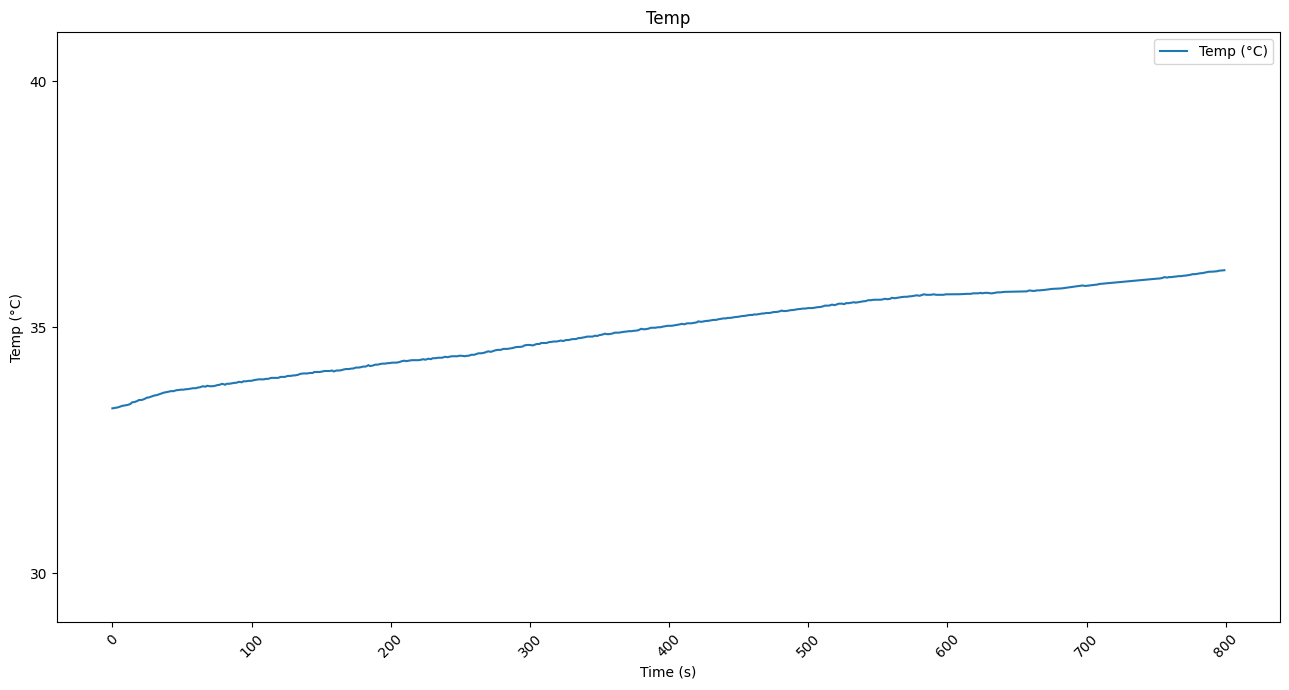

In [484]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(1, 1, figsize=(13, 7))

ax.plot(sdf_l['second'], sdf_l['Temp'], label='Temp (°C)')
ax.set_title('Temp')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Temp (°C)')
ax.legend()

y_min = 30
y_max = 40
margin = 1  # ขยายขอบบนขอบล่างอีก 1 หน่วย
ax.set_ylim(y_min - margin, y_max + margin)

ax.yaxis.set_major_locator(MultipleLocator(5))

for label in ax.get_xticklabels():
    label.set_rotation(45)

plt.tight_layout()
plt.show()


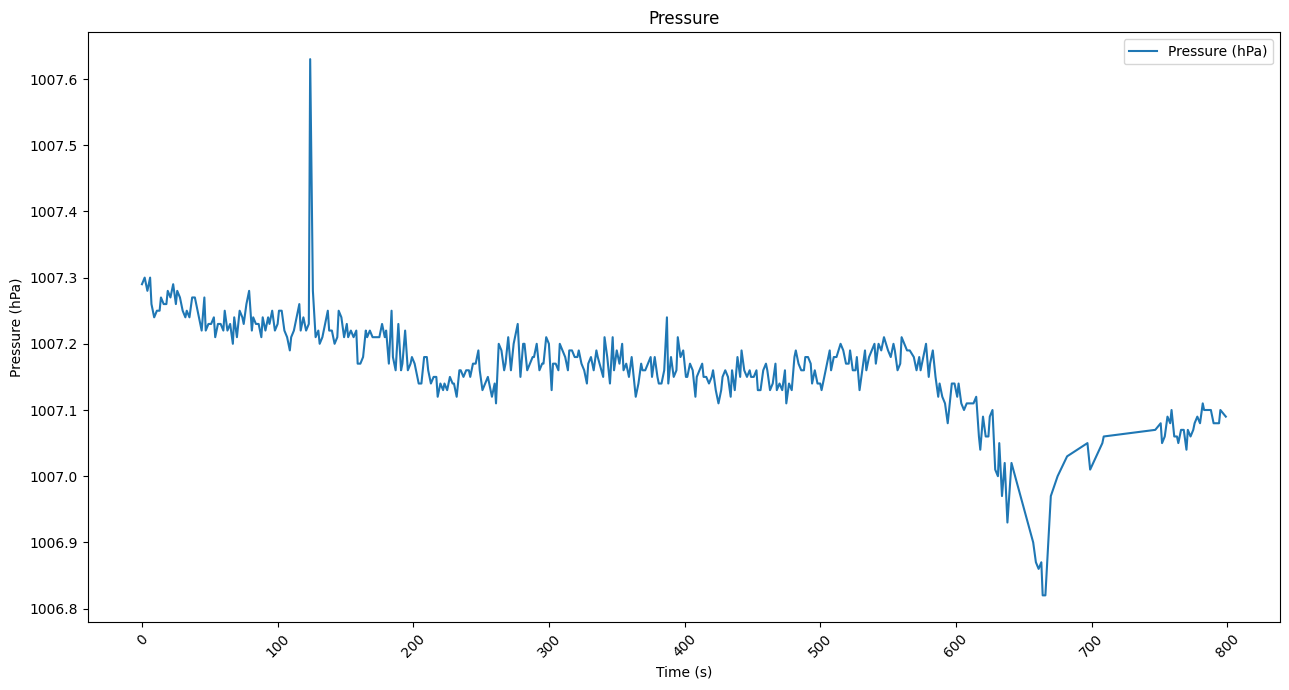

In [485]:
fig, ax = plt.subplots(1, 1,figsize=(13,7))

ax.plot(sdf_l['second'], sdf_l['Pressure'], label='Pressure (hPa)')
ax.set_title('Pressure')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pressure (hPa)')
ax.legend()
for label in ax.get_xticklabels():
    label.set_rotation(45)

fig.tight_layout()
plt.show()

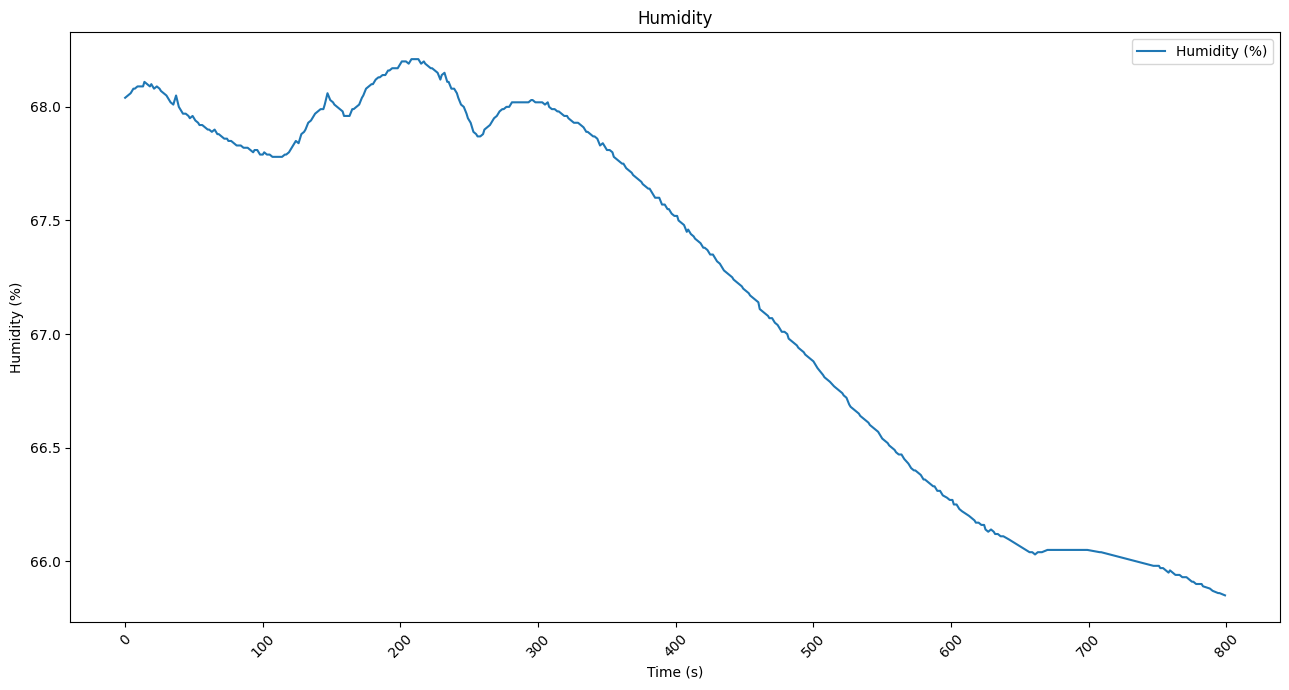

In [486]:
fig, ax = plt.subplots(1, 1,figsize=(13,7))

ax.plot(sdf_l['second'], sdf_l['Humidity'], label='Humidity (%)')
ax.set_title('Humidity')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Humidity (%)')
ax.legend()
for label in ax.get_xticklabels():
    label.set_rotation(45)

fig.tight_layout()
plt.show()

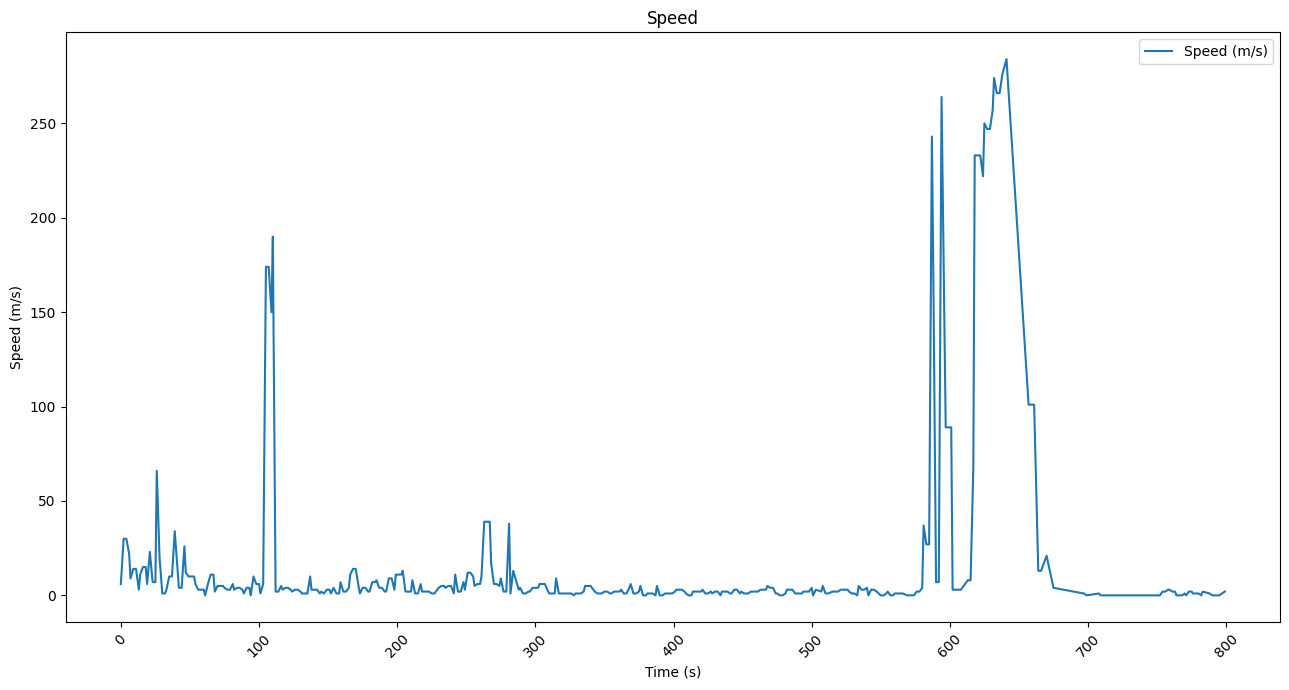

In [487]:
fig, ax = plt.subplots(1, 1,figsize=(13,7))

ax.plot(sdf_l['second'], sdf_l['Speed'], label='Speed (m/s)')
ax.set_title('Speed')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Speed (m/s)')
ax.legend()
for label in ax.get_xticklabels():
    label.set_rotation(45)

fig.tight_layout()
plt.show()

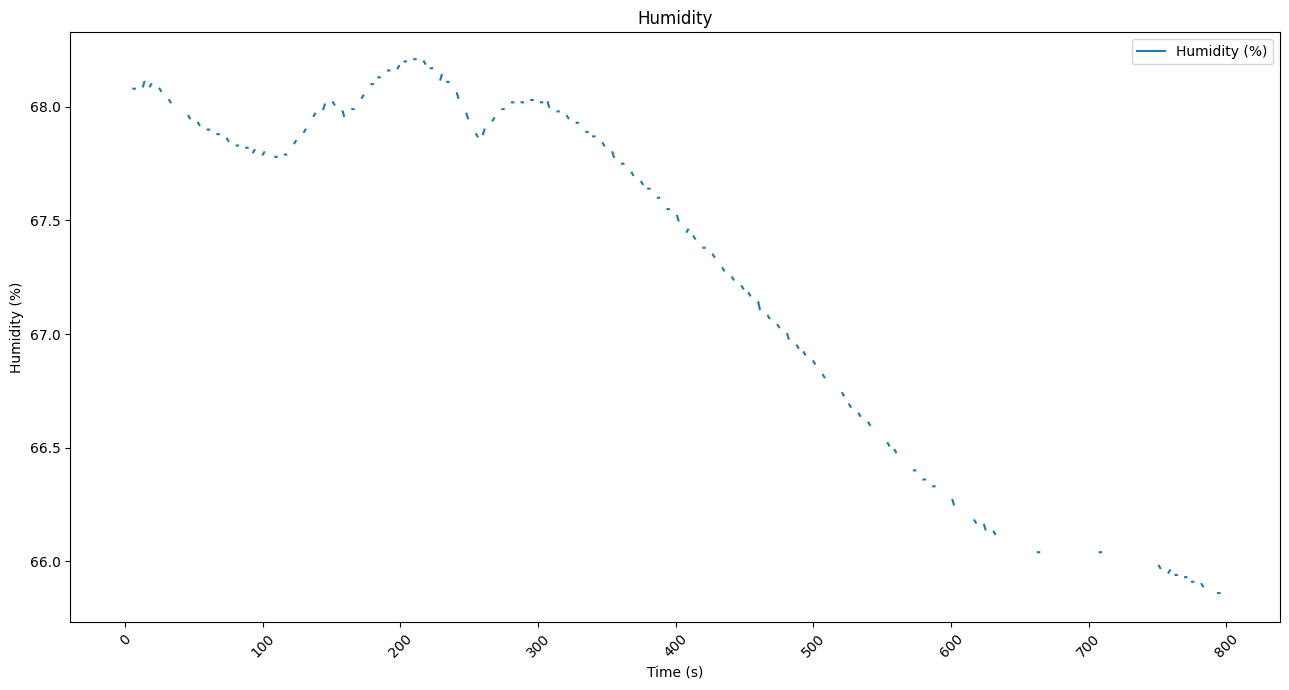

In [488]:
fig, ax = plt.subplots(1, 1,figsize=(13,7))

ax.plot(sdf['second'], sdf['Humidity'], label='Humidity (%)')
ax.set_title('Humidity')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Humidity (%)')
ax.legend()
for label in ax.get_xticklabels():
    label.set_rotation(45)

fig.tight_layout()
plt.show()

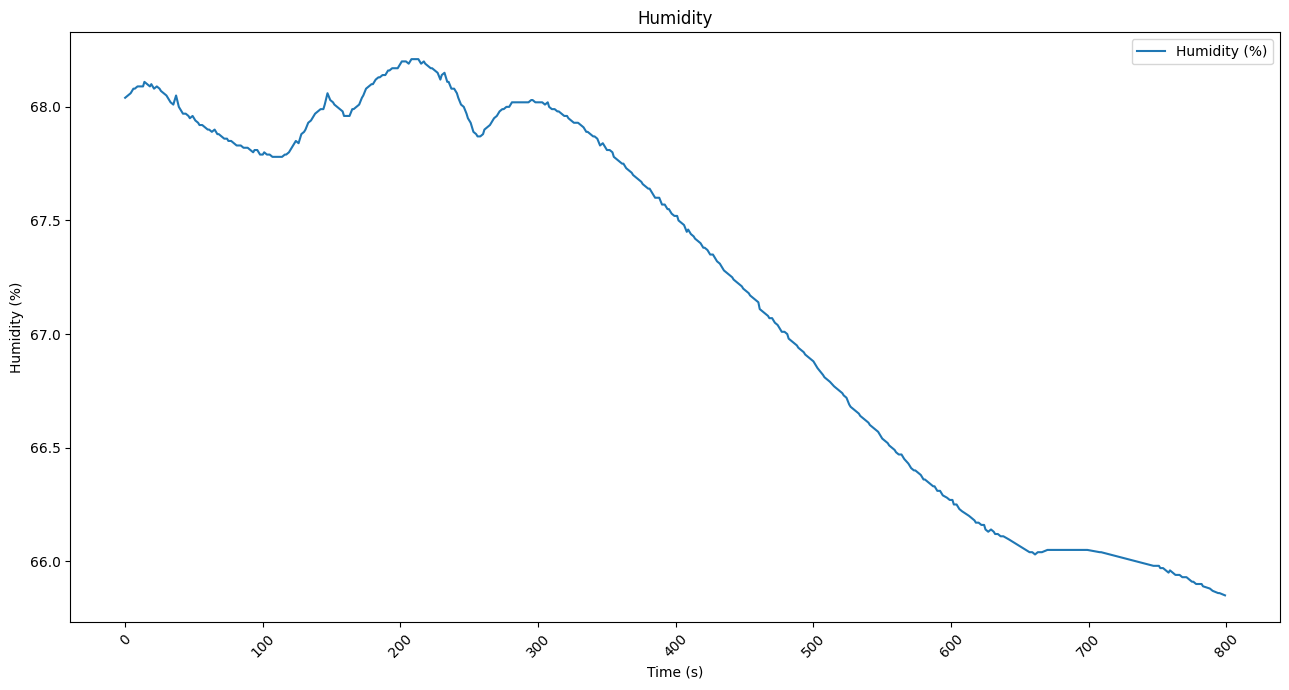

In [489]:
fig, ax = plt.subplots(1, 1,figsize=(13,7))

ax.plot(sdf_l['second'], sdf_l['Humidity'], label='Humidity (%)')
ax.set_title('Humidity')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Humidity (%)')
ax.legend()
for label in ax.get_xticklabels():
    label.set_rotation(45)

fig.tight_layout()
plt.show()

Map

In [490]:
fig = px.scatter_mapbox(
    sdf_l,
    lat="Latitude",
    lon="Longitude",
    hover_name="second",
    zoom=12,
    height=600,
    mapbox_style="open-street-map"
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


/tmp/ipykernel_1076830/2318710200.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [491]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [492]:
sdf_l.to_excel('sdf_l_output.xlsx', index=False)